In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-11-17 17:28:41,391 - INFO     - Executing shutdown due to inactivity...
2023-11-17 17:28:54,093 - INFO     - Executing shutdown...


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"C:\Users\HP\Downloads\winequalityN.csv")

In [4]:
data.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

<AxesSubplot:>

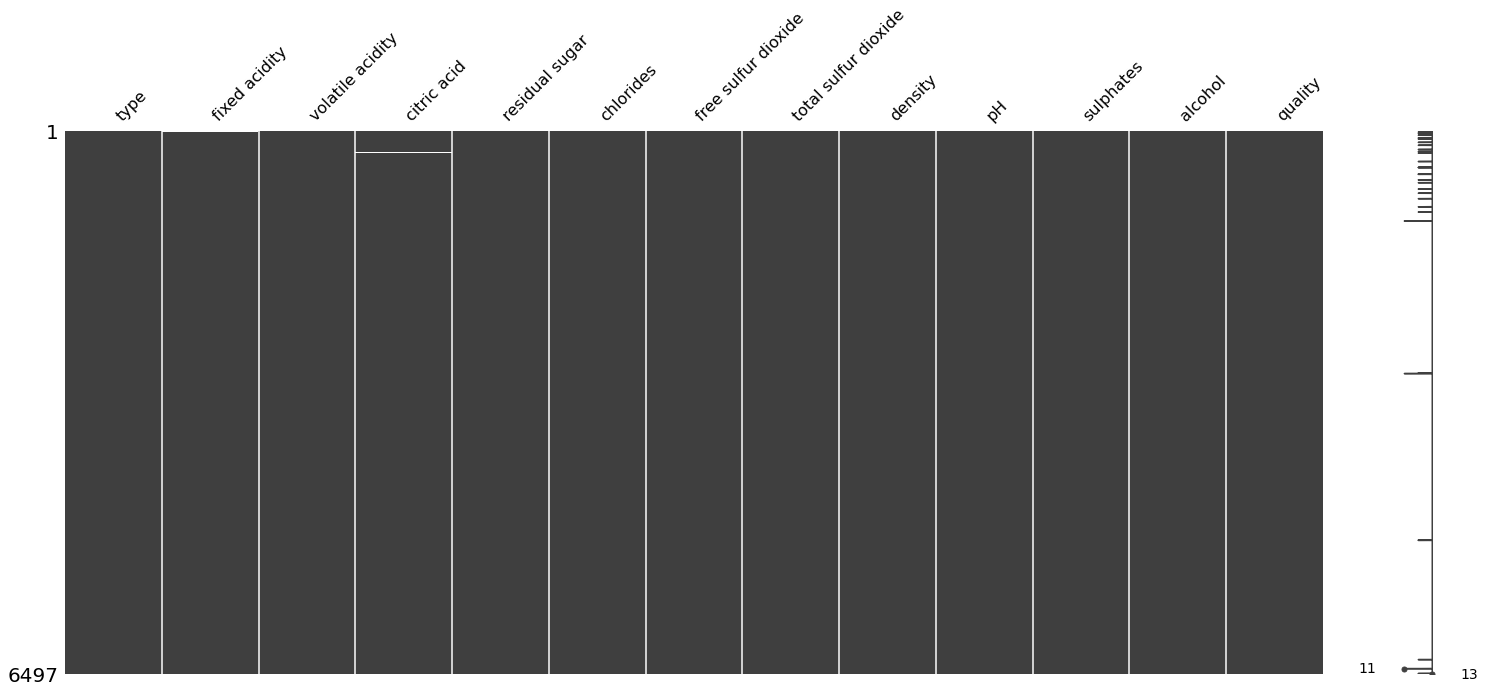

In [8]:
import missingno as msno
msno.matrix(data)

In [9]:
for col in data.columns:
    
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mean())

data.isnull().sum().sum()


0

In [10]:
data['type'].replace({'white':1,'red':0},inplace=True)

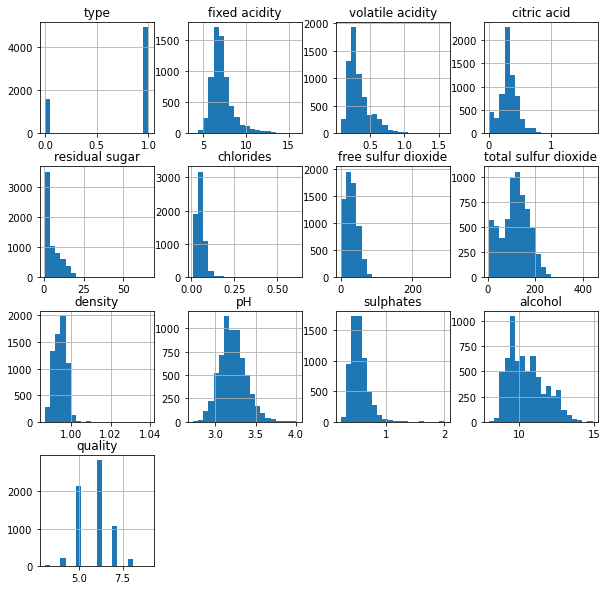

In [11]:
data.hist(bins=20,figsize=(10,10))
plt.show()

In [12]:
# AutoEDA
import sweetviz
my_report = sweetviz.analyze([data, "data"])

my_report.show_html('Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
import dtale

d = dtale.show(data)
d.open_browser()

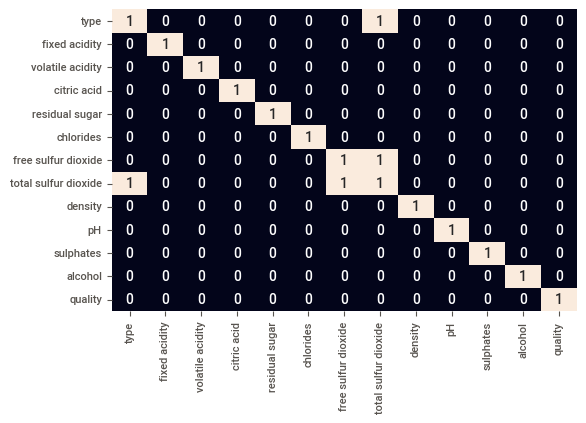

In [15]:
import seaborn as sns

sns.heatmap(data.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [16]:
data.drop('total sulfur dioxide',axis=1,inplace=True)

In [17]:
data['best quality'] = [1 if x > 5 else 0 for x in data.quality]

In [18]:
x= data.iloc[:, :-2].values
y= data.iloc[ :, -1].values

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40, test_size=0.2)

In [20]:
x_train.shape, x_test.shape

((5197, 11), (1300, 11))

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [63]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7376923076923076


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
lr_pred= lr_model.predict(x_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.53      0.60       474
           1       0.76      0.85      0.81       826

    accuracy                           0.74      1300
   macro avg       0.72      0.69      0.70      1300
weighted avg       0.73      0.74      0.73      1300



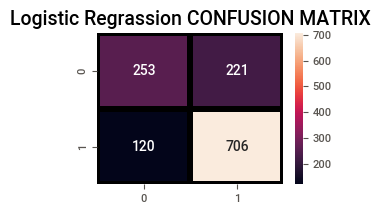

In [71]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regrassion CONFUSION MATRIX",fontsize=14)
plt.show()

In [41]:
# SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [42]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[242 232]
 [112 714]]


0.7353846153846154

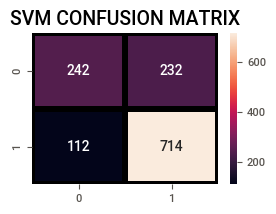

In [43]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVM CONFUSION MATRIX",fontsize=14)
plt.show()

In [44]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.51      0.58       474
           1       0.75      0.86      0.81       826

    accuracy                           0.74      1300
   macro avg       0.72      0.69      0.70      1300
weighted avg       0.73      0.74      0.73      1300



In [45]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
# train_predictions = xgb_classifier.predict(x_train)
y_pred = xgb_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[346 128]
 [ 99 727]]


0.8253846153846154

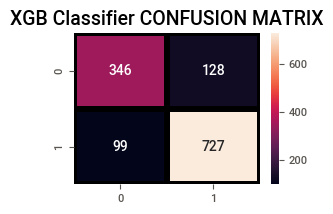

In [73]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGB Classifier CONFUSION MATRIX",fontsize=14)
plt.show()

In [74]:
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.53      0.60       474
           1       0.76      0.85      0.81       826

    accuracy                           0.74      1300
   macro avg       0.72      0.69      0.70      1300
weighted avg       0.73      0.74      0.73      1300



In [75]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression()
clf2 = SVC(probability=True)
clf3 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(x_train, y_train)
predictions = eclf1.predict(x_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.7992307692307692


In [76]:
report =classification_report(y_test, predictions)
report

'              precision    recall  f1-score   support\n\n           0       0.77      0.65      0.70       474\n           1       0.81      0.89      0.85       826\n\n    accuracy                           0.80      1300\n   macro avg       0.79      0.77      0.78      1300\nweighted avg       0.80      0.80      0.80      1300\n'

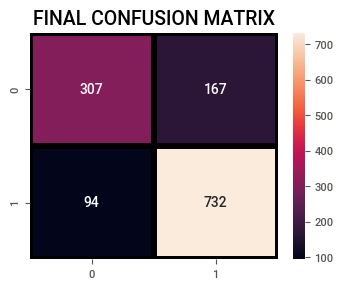

In [77]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

In [82]:
print(classifier.predict(sc.transform([[1,3.6,0.33,0.43,8.7,0.055,35,180,0.999,3.11,0.45]])))

[0]
